# Estimación con kernels densidad

**Kernel density estimation (KDE)** es una aproximación no paramétrica a la estimación de densidades. Puede interpretarse como un modelo generativo ya que define una distribución de probabilidad $p(\boldsymbol{x})$ que puede evaluarse en cualquier punto y, por tanto, puede muestrearse para generar nuevos datos.

## Kernels densidad

Un **kernel densidad** es una función $\mathcal{K}:\mathbb{R}\to\mathbb{R}^{\geq 0}$ simétrica que integra a uno:
$$\int\mathcal{K}(x)\,dx=1%
\qquad\text{y}\qquad%
\mathcal{K}(-x)=\mathcal{K}(x)$$
La simetría implica $\int x\mathcal{K}(x)\,dx=0$ y, en general:
$$\int x\mathcal{K}(x-x_n)\,dx=x_n$$
Algunos kernels populares son:
$$\begin{align*}
&\text{\bf Gaussiano:}    &&\mathcal{K}(x)=(2\pi)^{-\frac{1}{2}}e^{-x^2/2}%
&&\text{diferenciable, pero no compacto}\\%
&\text{\bf Boxcar:}       &&\mathcal{K}(x)=\frac{1}{2}\mathbb{I}(\lvert{x}\rvert\leq 1)%
&&\text{compacto, pero no diferenciable}\\%
&\text{\bf Epanechnikov:} &&\mathcal{K}(x)=\frac{3}{4}(1-x^2)\,\mathbb{I}(\lvert{x}\rvert\leq 1)%
&&\text{compacto y diferenciable salvo fronteras}\\%
&\text{\bf Tri-cube:}     &&\mathcal{K}(x)=\frac{70}{81}(1-\lvert{x}\rvert^3)^3\,\mathbb{I}(\lvert{x}\rvert\leq 1)%
&&\text{compacto y diferenciable}%
\end{align*}$$

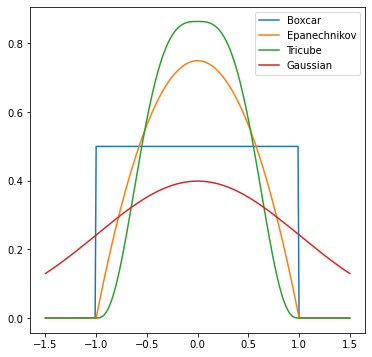

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def box(u): return (1/2)*(abs(u) <= 1)
def epa(u): return ((3/4)*(1 - np.power(u, 2))*(abs(u) <= 1))
def tri(u): return (70/81)*np.power((1- np.power(abs(u), 3)),3)*(abs(u) <= 1)
def gauss(u): return (1/np.sqrt(2*np.pi)) * np.exp(-np.power(u, 2)/2)
x = np.arange(-1.5, 1.501, 0.01)
plt.figure(figsize=(6, 6)); 
plt.plot(x, box(x), label='Boxcar'); plt.plot(x, epa(x), label='Epanechnikov'); 
plt.plot(x, tri(x), label='Tricube'); plt.plot(x, gauss(x), label='Gaussian'); plt.legend();

Con el fin de controlar el ancho de un kernel, introducimos un parámetro **bandwidth** o **ancho de banda** h>0:
$$\mathcal{K}_h(x)=\frac{1}{h}\mathcal{K}_h\left(\frac{x}{h}\right)$$

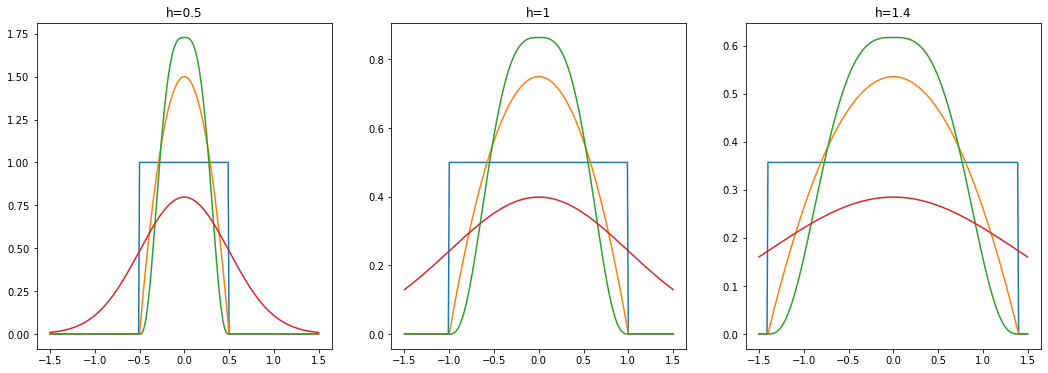

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def box(u, h=1): return (1/(2*h))*(abs(u/h) <= 1)
def epa(u, h=1): return ((3/(4*h))*(1 - np.power(u/h, 2))*(abs(u/h) <= 1))
def tri(u, h=1): return (70/(81*h))*np.power((1- np.power(abs(u/h), 3)),3)*(abs(u/h) <= 1)
def gauss(u, h=1): return (1/(np.sqrt(2*np.pi)*h)) * np.exp(-np.power(u/h, 2)/2)
x = np.arange(-1.5, 1.501, 0.01)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, h in enumerate([.5, 1, 1.4]):
    axes[i].set_title(r'h={}'.format(h))
    for fun in [box, epa, tri, gauss]:
        axes[i].plot(x, fun(x, h))

El kernel **radial basis function (RBF)** generaliza los kernels 1d a vectores:
$$\mathcal{K}_h(\boldsymbol{x})\propto\mathcal{K}_h(\lVert\boldsymbol{x}\rVert)$$
En el caso del kernel Gaussiano, esta generalización conduce a:
$$\mathcal{K}_h(\boldsymbol{x})=\dfrac{1}{h^D(2\pi)^{D/2}}\prod_{d=1}^D\exp\left(-\dfrac{1}{2h^2}x_d^2\right)$$